In [31]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
import matplotlib.pyplot as plt

In [32]:
df=pd.read_csv('C:/Users/Kaiyu/Downloads/GOLD.csv',parse_dates=True)
df = pd.DataFrame(df)

df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)

In [33]:
df

Date         Open         High          Low        Close  \
0     3/22/2010  1789.800049  1789.800049  1615.000000  1760.000000   
1     3/23/2010  1630.099976  1633.000000  1630.099976  1633.000000   
2     3/25/2010  1650.000000  1650.000000  1633.000000  1633.000000   
3     3/26/2010  1526.000000  1726.000000  1526.000000  1625.000000   
4     3/29/2010  1749.000000  1749.000000  1625.000000  1660.000000   
...         ...          ...          ...          ...          ...   
3439  2/23/2024  5498.000000  5498.000000  5498.000000  5498.000000   
3440  2/26/2024  5498.000000  5498.000000  5498.000000  5498.000000   
3441  2/27/2024  5535.000000  5535.000000  5514.950195  5514.950195   
3442  2/28/2024  5514.899902  5514.899902  5514.899902  5514.899902   
3443   3/1/2024  5527.299805  5527.299805  5527.299805  5527.299805   

        Adj Close  Volume  
0     1760.000000     5.0  
1     1633.000000     4.0  
2     1633.000000    11.0  
3     1625.000000    16.0  
4     1660.000000    13.0  
...           ...     ...  
3439  5498.000000     0.0  
3440  5498.000000     0.0  
3441  5514.950195    26.0  
3442  5514.899902     1.0  
3443  5527.299805     0.0  

[3444 rows x 7 columns]

In [34]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [35]:
df=df[["Date","High"]]
df.head()

Date         High
0  3/22/2010  1789.800049
1  3/23/2010  1633.000000
2  3/25/2010  1650.000000
3  3/26/2010  1726.000000
4  3/29/2010  1749.000000

In [36]:
df.columns = ['ds','y']
df['ds']=pd.to_datetime(df['ds'])
df.tail()

C:\Users\Kaiyu\AppData\Local\Temp\ipykernel_18528\3838032517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds']=pd.to_datetime(df['ds'])


ds            y
3439 2024-02-23  5498.000000
3440 2024-02-26  5498.000000
3441 2024-02-27  5535.000000
3442 2024-02-28  5514.899902
3443 2024-03-01  5527.299805

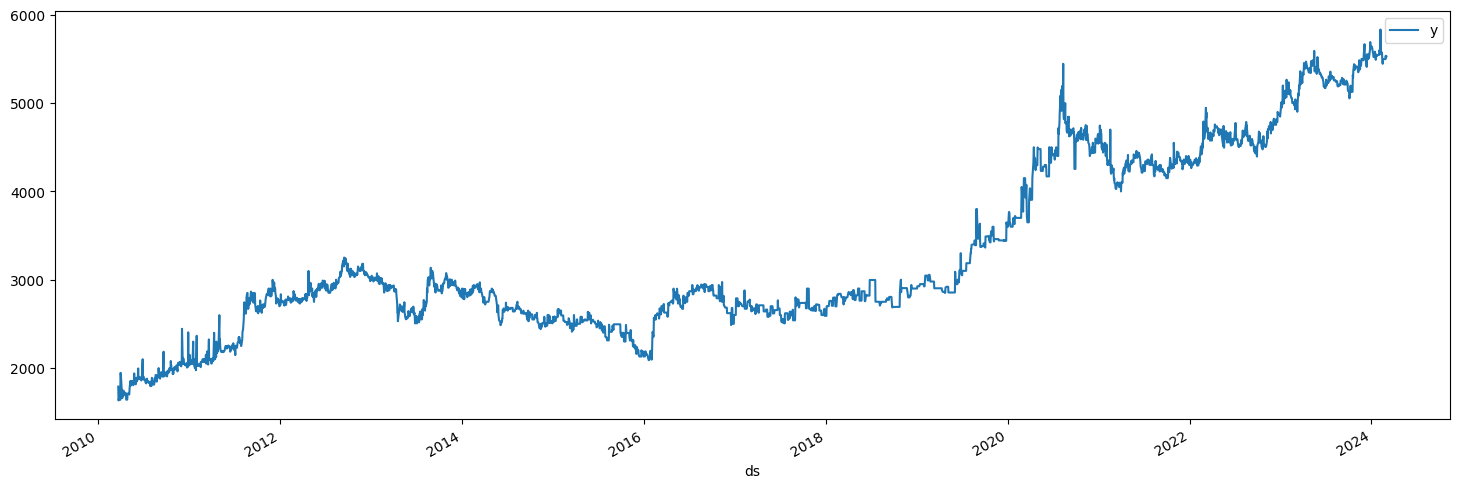

In [37]:
df.plot(x='ds',y='y',figsize=(18,6))
plt.show()

In [38]:
df = df[(df['ds'] >= '2016-02-01') & (df['ds'] <= '2024-01-31')]
# df = df[(df['ds'].dt.year >= 2022) & (df['ds'].dt.year <= df['ds'].dt.year.max())]

In [39]:
df

ds            y
1447 2016-02-01  2095.000000
1448 2016-02-02  2100.000000
1449 2016-02-03  2229.000000
1450 2016-02-04  2349.899902
1451 2016-02-05  2410.000000
...         ...          ...
3418 2024-01-24  5543.850098
3419 2024-01-25  5543.850098
3420 2024-01-29  5544.000000
3421 2024-01-30  5548.649902
3422 2024-01-31  5548.649902

[1976 rows x 2 columns]

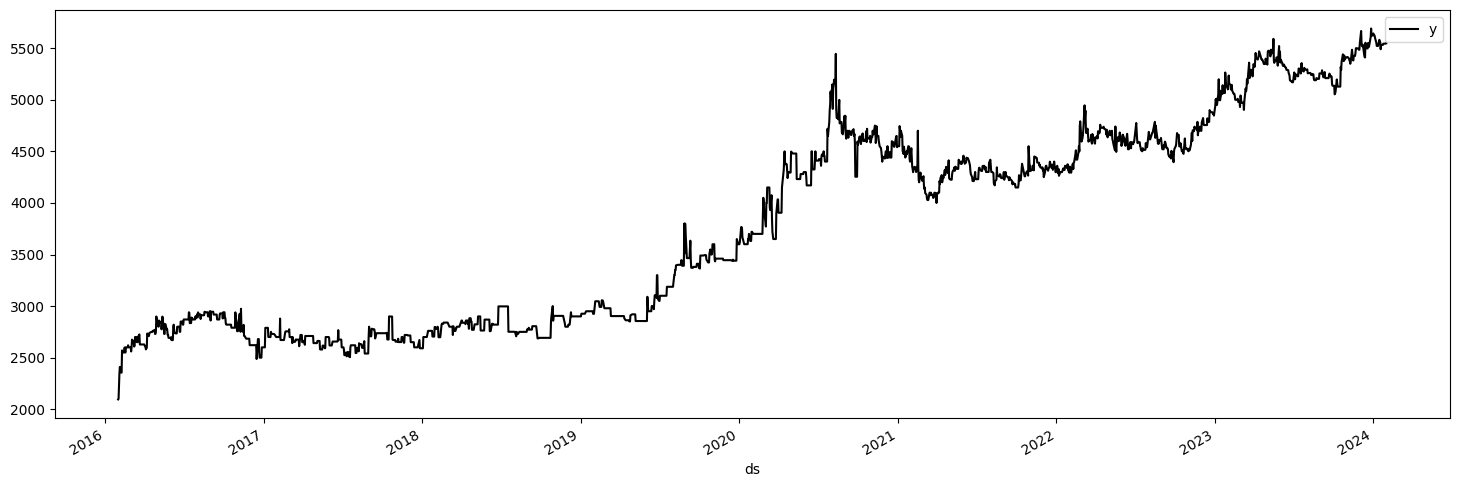

In [40]:
df.plot(x='ds',y='y',figsize=(18,6),color='black')
plt.show()

In [41]:
len(df)

1976

In [42]:
train = df.iloc[:len(df)-200]
test = df.iloc[len(df)-200:]

In [43]:
train

ds            y
1447 2016-02-01  2095.000000
1448 2016-02-02  2100.000000
1449 2016-02-03  2229.000000
1450 2016-02-04  2349.899902
1451 2016-02-05  2410.000000
...         ...          ...
3218 2023-03-31  5344.950195
3219 2023-04-03  5320.000000
3220 2023-04-05  5453.950195
3221 2023-04-06  5410.000000
3222 2023-04-10  5390.000000

[1776 rows x 2 columns]

In [44]:
test

ds            y
3223 2023-04-11  5410.000000
3224 2023-04-12  5427.000000
3225 2023-04-13  5469.899902
3226 2023-04-17  5415.000000
3227 2023-04-18  5395.000000
...         ...          ...
3418 2024-01-24  5543.850098
3419 2024-01-25  5543.850098
3420 2024-01-29  5544.000000
3421 2024-01-30  5548.649902
3422 2024-01-31  5548.649902

[200 rows x 2 columns]

In [45]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=1000) #MS for monthly, H for hourly
forecast = m.predict(future)

11:47:48 - cmdstanpy - INFO - Chain [1] start processing
11:47:49 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(480)

ds         yhat   yhat_lower   yhat_upper
2296 2024-09-12  5720.774140  4648.801679  6773.120092
2297 2024-09-13  5720.578842  4625.133262  6829.928555
2298 2024-09-14  5789.026863  4752.779666  6879.315007
2299 2024-09-15  5835.978540  4743.930250  6914.014658
2300 2024-09-16  5719.467508  4605.189211  6792.135065
...         ...          ...          ...          ...
2771 2025-12-31  6418.913370  3456.979465  9361.603102
2772 2026-01-01  6421.283712  3424.386747  9326.796247
2773 2026-01-02  6428.526998  3441.472195  9327.806719
2774 2026-01-03  6504.234517  3440.428522  9453.331778
2775 2026-01-04  6558.230757  3571.095966  9472.085256

[480 rows x 4 columns]

In [47]:
plot_plotly(m ,forecast)

In [48]:
plot_components_plotly(m, forecast)

In [49]:
from statsmodels.tools.eval_measures import rmse
predictions = forecast.iloc[-200:]['yhat']
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  942.379915672976
Mean Value of Test Dataset: 5358.7947046


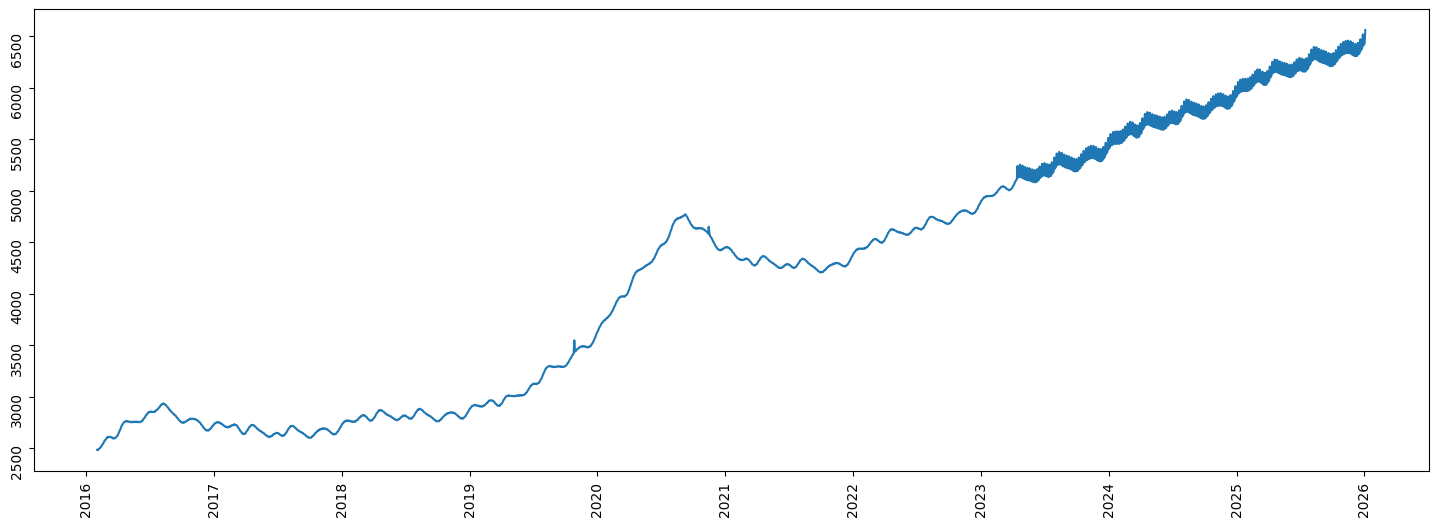

In [50]:
forecast['ds'] = pd.to_datetime(forecast['ds'])

forecast = forecast.dropna(subset=['yhat'])

plt.figure(figsize=(18, 6))
plt.plot(forecast['ds'], forecast['yhat'])
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.show()

In [51]:
forecast = forecast[(forecast['ds'] >= '2024-02-01') & (forecast['ds'].dt.year <= forecast['ds'].dt.year.max())]
forecast=forecast[['ds','yhat']]
forecast.reset_index(drop=True, inplace=True)

In [52]:
forecast

ds         yhat
0   2024-02-01  5455.785286
1   2024-02-02  5457.819141
2   2024-02-03  5528.830115
3   2024-02-04  5578.688063
4   2024-02-05  5465.427292
..         ...          ...
699 2025-12-31  6418.913370
700 2026-01-01  6421.283712
701 2026-01-02  6428.526998
702 2026-01-03  6504.234517
703 2026-01-04  6558.230757

[704 rows x 2 columns]

In [53]:
result_df=pd.read_csv('E:/forecast.csv')
result_df = pd.DataFrame(result_df)

In [54]:
result_df

0             1           2             3           4  \
0    2024-01-01  4.005375e+06  2024-02-01  22018.440428  2024-02-01   
1    2024-01-02  3.998168e+06  2024-02-02  22005.386495  2024-02-02   
2    2024-01-03  4.015374e+06  2024-02-03  21330.332854  2024-02-03   
3    2024-01-04  4.046743e+06  2024-02-04  21377.546742  2024-02-04   
4    2024-01-05  4.045816e+06  2024-02-05  22088.238356  2024-02-05   
..          ...           ...         ...           ...         ...   
695         NaN           NaN         NaN           NaN  2025-12-27   
696         NaN           NaN         NaN           NaN  2025-12-28   
697         NaN           NaN         NaN           NaN  2025-12-29   
698         NaN           NaN         NaN           NaN  2025-12-30   
699         NaN           NaN         NaN           NaN  2025-12-31   

               5  
0    1633.417339  
1    1630.507544  
2    1707.703634  
3    1621.516883  
4    1643.368288  
..           ...  
695  1809.863145  
696  1727.620115  
697  1752.826919  
698  1756.046648  
699  1759.657181  

[700 rows x 6 columns]

In [55]:
result_df = pd.concat([result_df,forecast],axis=1,ignore_index=True)

In [56]:
result_df

0             1           2             3           4  \
0    2024-01-01  4.005375e+06  2024-02-01  22018.440428  2024-02-01   
1    2024-01-02  3.998168e+06  2024-02-02  22005.386495  2024-02-02   
2    2024-01-03  4.015374e+06  2024-02-03  21330.332854  2024-02-03   
3    2024-01-04  4.046743e+06  2024-02-04  21377.546742  2024-02-04   
4    2024-01-05  4.045816e+06  2024-02-05  22088.238356  2024-02-05   
..          ...           ...         ...           ...         ...   
699         NaN           NaN         NaN           NaN  2025-12-31   
700         NaN           NaN         NaN           NaN         NaN   
701         NaN           NaN         NaN           NaN         NaN   
702         NaN           NaN         NaN           NaN         NaN   
703         NaN           NaN         NaN           NaN         NaN   

               5          6            7  
0    1633.417339 2024-02-01  5455.785286  
1    1630.507544 2024-02-02  5457.819141  
2    1707.703634 2024-02-03  5528.830115  
3    1621.516883 2024-02-04  5578.688063  
4    1643.368288 2024-02-05  5465.427292  
..           ...        ...          ...  
699  1759.657181 2025-12-31  6418.913370  
700          NaN 2026-01-01  6421.283712  
701          NaN 2026-01-02  6428.526998  
702          NaN 2026-01-03  6504.234517  
703          NaN 2026-01-04  6558.230757  

[704 rows x 8 columns]

In [57]:
result_df.to_csv('forecast.csv', index=False)